# Exeption Handling

Coding mistake come in three basic flavors:

    Syntax errors: Errors where the code is not valid Python (generally easy to fix)
    Runtime errors: Errors where syntactically valid code fails to execute, perhaps due to invalid user input (sometimes easy to fix)
    Semantic errors: Errors in logic: code executes without a problem, but the result is not what you expect (often very difficult to track-down and fix)

Here we're going to focus on how to deal cleanly with runtime errors. As we'll see, Python handles runtime errors via its exception handling framework.

For example, if you try to reference an undefined variable:

In [ ]:
print(Q)

Or if you try an operation that's not defined:

In [ ]:
1 + 'abc'

Or you might be trying to compute a mathematically ill-defined result:

In [ ]:
2 / 0

or maybe you're trying to access a sequence element that doesn't exist:

In [ ]:
L = [1, 2, 3]
L[1000]

Or you're using invalid datatype

In [ ]:
x=int(input("Enter an integer"))
print("This prints only if exception did not occur or was handled")

other examples: assertion error, file error, invalid arguments to function etc..

The program is said to have <i><b>thrown an exception </b></i>

## Catching Exceptions: try and except

Basic structure of try-except clause:

In [ ]:
try:
    print("this gets executed first")
except:
    print("this gets executed only if there is an error")
print("This prints only if exception did not occur or was handled")

In [ ]:
try:
    print("this gets executed first")
    5/0
    print("All remaining statement in try block are skipped if exception occurs")
except:
    print("this gets executed only if there is an error")
print("This prints only if exception did not occur or was handled")

In [ ]:
def safe_divide(a, b):
    try:
        return a / b
    except:
        return 1E100
print(safe_divide(5,2))
print("This prints only if exception did not occur or was handled")
print(safe_divide(2,0))
print("This prints only if exception did not occur or was handled")

## Specialized except blocks+ multiple except blocks

In [ ]:
def safe_divide(a, b):
    try:
          print(a/b)
          print("Safe division")
          print('10'+10)
    except TypeError:
          print("You added values of incompatible types\n")
    except ZeroDivisionError:
          print(1E100)
print("CALL safe_divide(2,3)")
safe_divide(2,3)
print("CALL safe_divide(2,0)")
safe_divide(2,0)
print("This prints only if exception did not occur or was handled")

### Multiple exceptions can be handled same way via single except block

In [ ]:
try:
      print('10'+10)
      print(1/0)
except (TypeError,ZeroDivisionError):
      print("Invalid input")


### A Generic except After All Excepts

In [1]:
try:
           print('1'+1)
           print(x)
           print(1/0)
except NameError:
           print("x does not exist")
except ZeroDivisionError:
           print("Cannot divide by 0")
except:
           print("Something went wrong")

x does not exist


There can only be one generic or default except block for one try block. And it should be the last one otherwise there's no use of subsequent blocks as first matching block is executed after an exception is thrown

In [2]:
try:
       print(1/0)
except:
       print("first generic")
except ZeroDivisionError:
       print("Raised exception caught")

SyntaxError: default 'except:' must be last (<ipython-input-2-c593e477b2cb>, line 5)

Five of the common exceptions are described in the figure below.
Each exception is defined by its own exception class. Some are specialized child-classes derived from a more generic parent class. The most generic class is <b>Exception</b> class.
Except clause must be code in order of most specific to most generic for the same reason as mentioned before that the first matching block is executed.

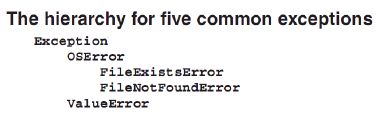

Example:
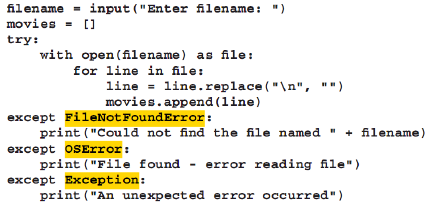

OSError may occur if we try to read binary file in text mode or file is read only but we try to open it in write mode etc.

### Getting information from exception object
type of exception
error message

In [3]:
try:
    x = 1 / 0
except Exception as err:
    print("Error class is:  ", type(err))
    print("Error message is:", err)

Error class is:   <class 'ZeroDivisionError'>
Error message is: division by zero


#### sys.exit() to terminate the program as part of exception handling routine

In [ ]:
import sys
try:
    x = 1 / 0
except Exception as err:
    print(type(err), err)
    sys.exit()

<br>

### Finally Block
It comes after the last except block. The code under this block executes in all circumstances.
This may be important when we want to include code for freeing up memory resources or any other cleanup whether or not an exception occurs. 
eg: file.close() can be put in finally clause. or we could simply use with statement.

In [6]:
a=2
b=0
try:
        print(a/b)
except ValueError:
        print("This is a value error")  #Finally will execute even if an exception is thrown here
finally:
        print("This will print no matter what.")

This is a value error
This will print no matter what.


### Raise Keyword 
Sometimes we may want to raise a certain exception ourselves.

In [9]:
a,b=int(input()),int(input())
if b==0:
        raise ZeroDivisionError("can not divide by zero")

2
0


ZeroDivisionError: can not divide by zero

#### Option to simply re- raise whichever exception occured

In [10]:
try:
         print('1'+1)
except:
         raise

TypeError: can only concatenate str (not "int") to str

#### Raise With an Message

In [ ]:
try:
         print('1'+1)
except Exception as e:
         raise e